In [25]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [26]:
import Atools as Atools
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.stats import pearsonr
from datetime import datetime
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib import gridspec
from scipy import stats
def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended

def is_jfm(month):
    return (month>=1) & (month<=3)

def is_fma(month):
    return (month>=2) & (month<=4)

def is_mam(month):
    return (month>=3) & (month<=5)

def is_amj(month):
    return (month>=4) & (month<=6)

def is_mjj(month):
    return (month>=5) & (month<=7)

def is_jja(month):
    return (month>=6) & (month<=8)

def is_jas(month):
    return (month>=7) & (month<=9)

def is_aso(month):
    return (month>=8) & (month<=10)

def is_son(month):
    return (month>=9) & (month<=11)

def is_ond(month):
    return (month>=10) & (month<=12)

def is_ndj(month):
    return (month==11)|(month==12)|(month==1)

def is_djf(month):
    return (month==12)|(month==1)|(month==2)


def plot_regress_map(ax,ssta_detrended_std,levels,cmap):
    ftz=15
    
    p0=ax.contourf(ssta_detrended_std.lon,ssta_detrended_std.lat,ssta_detrended_std.alpha,
                      cmap=cmap,transform=ccrs.PlateCarree(),levels=levels,extend='both')
    #ax.add_patch(mpatches.Rectangle(xy=[-20, -3], width=20, height=6,edgecolor='blue',fill=None,
    #                                    alpha=1,linewidth=3,label='ATL3'))
    c1b = ax.contourf(ssta_detrended_std.lon,ssta_detrended_std.lat,
                      ssta_detrended_std.pval,[np.min(ssta_detrended_std.pval),0.05,np.max(ssta_detrended_std.pval)],
                      zorder=2,
                          hatches=['.', None],colors="none", transform=ccrs.PlateCarree())
    CS = ax.contour(ssta_detrended_std.lon,ssta_detrended_std.lat,ssta_detrended_std.rval**2,
                      colors='black',transform=ccrs.PlateCarree(),levels=[0.4,0.6,0.8])
    ax.clabel(CS, inline=1, fontsize=10,zorder=2)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='-',zorder=3)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': ftz, 'color': 'black'}
    gl.ylabel_style = {'size': ftz, 'color': 'black'}
    gl.xlocator = mticker.FixedLocator([-40,-20, 0,20])
    gl.ylocator = mticker.FixedLocator([-20,-10, 0,10,20])
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='lightgrey',zorder=2)
    #ax0.add_feature(cartopy.feature.BORDERS,zorder=2)# adds national borders
    ax.add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
    #ax[i].add_feature(cartopy.feature.RIVERS,zorder=2)# add rivers
    #ax.set_title(ssta_detrended_std.model.values,fontsize=ftz)
    return p0

def plot_regress_map_diff(ax,ssta_detrended_std,levels,cmap):
    ftz=15
    
    p0=ax.contourf(ssta_detrended_std.lon,ssta_detrended_std.lat,ssta_detrended_std.alpha,
                      cmap=cmap,transform=ccrs.PlateCarree(),levels=levels,extend='both')
    #ax.add_patch(mpatches.Rectangle(xy=[-20, -3], width=20, height=6,edgecolor='blue',fill=None,
    #                                    alpha=1,linewidth=3,label='ATL3'))

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='-',zorder=3)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': ftz, 'color': 'black'}
    gl.ylabel_style = {'size': ftz, 'color': 'black'}
    gl.xlocator = mticker.FixedLocator([-40,-20, 0,20])
    gl.ylocator = mticker.FixedLocator([-20,-10, 0,10,20])
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='lightgrey',zorder=2)
    #ax0.add_feature(cartopy.feature.BORDERS,zorder=2)# adds national borders
    ax.add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
    #ax[i].add_feature(cartopy.feature.RIVERS,zorder=2)# add rivers
    #ax.set_title(ssta_detrended_std.model.values,fontsize=ftz)
    return p0

In [27]:
dir_data1 = '/work/bb1153/b381638/ICON/ngc2013/'
dir_data2 = '/work/bb1153/b381638/ICON/rthk001/'

dir_ind = '/work/bb1153/b381602/ICON/indices/'
dir_ind2 = '/work/bb1153/b381602/ICON/'

# Load data and take the common time period

In [28]:

data_ngc2013_tauu = xr.open_dataset(dir_ind2+'tauu_ngc2013_grid01x01_20200201-20500131_monmean.nc')
data_rthk001_tauu = xr.open_dataset(dir_ind2+'tauu_rthk001_grid01x01_20200201-20500131_monmean.nc')


data_ngc2013 = xr.open_dataset(dir_data1+'zos_ngc2013_grid01x01_20200201-20500131_monmean.nc')
data_rthk001 = xr.open_dataset(dir_data2+'zos_rthk001_grid01x01_20200201-20500131_monmean.nc')

data_ngc2013_new = xr.concat([data_ngc2013.zos[:,:,180:],data_ngc2013.zos[:,:,:180]],dim = 'lon') 
data_ngc2013_new.coords['lon'] = (data_ngc2013_new.coords['lon'] + 180)%360 - 180


data_rthk001_new = xr.concat([data_rthk001.zos[:,:,180:],data_rthk001.zos[:,:,:180]],dim = 'lon') 
data_rthk001_new.coords['lon'] = (data_rthk001_new.coords['lon'] + 180)%360 - 180



data_ngc2013_tauu_new = xr.concat([data_ngc2013_tauu.tauu[:,:,180:],data_ngc2013_tauu.tauu[:,:,:180]],dim = 'lon') 
data_ngc2013_tauu_new.coords['lon'] = (data_ngc2013_tauu_new.coords['lon'] + 180)%360 - 180


data_rthk001_tauu_new = xr.concat([data_rthk001_tauu.tauu[:,:,180:],data_rthk001_tauu.tauu[:,:,:180]],dim = 'lon') 
data_rthk001_tauu_new.coords['lon'] = (data_rthk001_tauu_new.coords['lon'] + 180)%360 - 180




zos_1 = data_ngc2013_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))
zos_2 = data_rthk001_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))





tauu_1 = data_ngc2013_tauu_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))
tauu_2 = data_rthk001_tauu_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))

In [29]:


tauu_1 = tauu_1.where(zos_1[0,:,:]!=0)
tauu_2 = tauu_2.where(zos_1[0,:,:]!=0)




zos_1 = zos_1.where(zos_1[0,:,:]!=0)
zos_2 = zos_2.where(zos_2[0,:,:]!=0)





In [30]:
sst_atl_1 = Atools.data_sub(zos_1,-45,20,-30,10)
sst_atl_2 = Atools.data_sub(zos_2,-45,20,-30,10)


tauu_atl_1 = Atools.data_sub(tauu_1,-40,-20,-3,3)
tauu_atl_2 = Atools.data_sub(tauu_2,-40,-20,-3,3)

# Linearly detrend

In [31]:
sst_atl_dtd_1 = np.ones((sst_atl_1.shape[0],sst_atl_1.shape[1],sst_atl_1.shape[2]))*np.nan
xdata_1 = np.arange(0,sst_atl_1.time.shape[0],1)
ydata_1_tmp = np.array(sst_atl_1)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            sst_atl_dtd_1[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

sst_detrended_atl_1 = xr.Dataset({'sst': (['time','lat','lon'], sst_atl_dtd_1),
                               },
                      coords={
                              'time': np.array(sst_atl_1.time),
                              'lat': np.array(sst_atl_1.lat),
                              'lon':np.array(sst_atl_1.lon)})



sst_atl_dtd_2 = np.ones((sst_atl_2.shape[0],sst_atl_2.shape[1],sst_atl_2.shape[2]))*np.nan
xdata_1 = np.arange(0,sst_atl_2.time.shape[0],1)
ydata_1_tmp = np.array(sst_atl_2)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            sst_atl_dtd_2[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

sst_detrended_atl_2 = xr.Dataset({'sst': (['time','lat','lon'], sst_atl_dtd_2),
                               },
                      coords={
                              'time': np.array(sst_atl_2.time),
                              'lat': np.array(sst_atl_2.lat),
                              'lon':np.array(sst_atl_2.lon)})






tauu_atl_dtd_1 = np.ones((tauu_atl_1.shape[0],tauu_atl_1.shape[1],tauu_atl_1.shape[2]))*np.nan
xdata_1 = np.arange(0,tauu_atl_1.time.shape[0],1)
ydata_1_tmp = np.array(tauu_atl_1)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            tauu_atl_dtd_1[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

tauu_detrended_atl_1 = xr.Dataset({'tauu': (['time','lat','lon'], tauu_atl_dtd_1),
                               },
                      coords={
                              'time': np.array(tauu_atl_1.time),
                              'lat': np.array(tauu_atl_1.lat),
                              'lon':np.array(tauu_atl_1.lon)})



tauu_atl_dtd_2 = np.ones((tauu_atl_2.shape[0],tauu_atl_2.shape[1],tauu_atl_2.shape[2]))*np.nan
xdata_1 = np.arange(0,tauu_atl_2.time.shape[0],1)
ydata_1_tmp = np.array(tauu_atl_2)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            tauu_atl_dtd_2[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

tauu_detrended_atl_2 = xr.Dataset({'tauu': (['time','lat','lon'], tauu_atl_dtd_2),
                               },
                      coords={
                              'time': np.array(tauu_atl_2.time),
                              'lat': np.array(tauu_atl_2.lat),
                              'lon':np.array(tauu_atl_2.lon)})


In [32]:
zos_atl3_1 = Atools.data_sub(sst_detrended_atl_1.sst,-20,0,-3,3)
zos_atl3_2 = Atools.data_sub(sst_detrended_atl_2.sst,-20,0,-3,3)

# Compute sst anomalies

In [33]:
ssta_1,_ = Atools.ano_norm_t(sst_detrended_atl_1.sst)
ssta_2,_ = Atools.ano_norm_t(sst_detrended_atl_2.sst)

zosa_1_atl3,_ = Atools.ano_norm_t(zos_atl3_1.weighted(
    np.cos(np.deg2rad(zos_atl3_1.lat))).mean(('lon','lat')))
zosa_2_atl3,_ = Atools.ano_norm_t(zos_atl3_2.weighted(
    np.cos(np.deg2rad(zos_atl3_2.lat))).mean(('lon','lat')))




tauua_1,_ = Atools.ano_norm_t(tauu_detrended_atl_1.tauu.weighted(
    np.cos(np.deg2rad(sst_detrended_atl_1.lat))).mean(('lon','lat')))
tauua_2,_ = Atools.ano_norm_t(tauu_detrended_atl_2.tauu.weighted(
    np.cos(np.deg2rad(sst_detrended_atl_1.lat))).mean(('lon','lat')))


In [40]:
zosa_1_jja = ssta_1.sel(time=is_jja(ssta_1['time.month'])).groupby('time.year').mean()
zosa_2_jja = ssta_2.sel(time=is_jja(ssta_2['time.month'])).groupby('time.year').mean()


zosa_1_ond = ssta_1.sel(time=is_ond(ssta_1['time.month'])).groupby('time.year').mean()
zosa_2_ond = ssta_2.sel(time=is_ond(ssta_2['time.month'])).groupby('time.year').mean()




tauua_1_amj = tauua_1.sel(time=is_amj(tauua_1['time.month'])).groupby('time.year').mean()
tauua_2_amj = tauua_2.sel(time=is_amj(tauua_2['time.month'])).groupby('time.year').mean()


tauua_1_jja = tauua_1.sel(time=is_jja(tauua_1['time.month'])).groupby('time.year').mean()
tauua_2_jja = tauua_2.sel(time=is_jja(tauua_2['time.month'])).groupby('time.year').mean()


tauua_1_mjj = tauua_1.sel(time=is_mjj(tauua_1['time.month'])).groupby('time.year').mean()
tauua_2_mjj = tauua_2.sel(time=is_mjj(tauua_2['time.month'])).groupby('time.year').mean()


tauua_1_son = tauua_1.sel(time=is_son(tauua_1['time.month'])).groupby('time.year').mean()
tauua_2_son = tauua_2.sel(time=is_son(tauua_2['time.month'])).groupby('time.year').mean()






tauua_1_ond = tauua_1.sel(time=is_ond(tauua_1['time.month'])).groupby('time.year').mean()
tauua_2_ond = tauua_2.sel(time=is_ond(tauua_2['time.month'])).groupby('time.year').mean()




zosa_1_jja_atl3 = zosa_1_atl3.sel(time=is_jja(zosa_1_atl3['time.month'])).groupby('time.year').mean()
zosa_2_jja_atl3 = zosa_2_atl3.sel(time=is_jja(zosa_2_atl3['time.month'])).groupby('time.year').mean()



#### Save intermediate files

In [41]:
#zosa_1_jja_atl3.to_netcdf('data/zosa_atl3_jja_ngc2013.nc')
#zosa_2_jja_atl3.to_netcdf('data/zosa_atl3_jja_rthk001.nc')




In [42]:
def regress_xy(x,y):

    alpha = np.ones((y.shape[1],y.shape[2]))*np.nan
    rval = np.ones((y.shape[1],y.shape[2]))*np.nan
    pval = np.ones((y.shape[1],y.shape[2]))*np.nan
    for i in range(alpha.shape[0]):
        for j in range(alpha.shape[1]):
            alpha[i,j], _ , rval[i,j],pval[i,j],_ = stats.linregress(x[:],y[:,i,j])
            
    regression = xr.Dataset({'alpha': (['lat','lon'], alpha),
                             'rval': (['lat','lon'], rval),
                             'pval': (['lat','lon'], pval),
                               },
                      coords={
                              
                              'lat': np.array(y.lat),
                              'lon':np.array(y.lon)})
            
    return regression

In [45]:
bf2_1 = regress_xy(tauua_1_jja,zosa_1_jja)
bf2_2 = regress_xy(tauua_2_jja,zosa_2_jja)


bf2_1_mjj = regress_xy(tauua_1_mjj,zosa_1_jja)
bf2_2_mjj = regress_xy(tauua_2_mjj,zosa_2_jja)






bf2_1_ond = regress_xy(tauua_1_ond,zosa_1_ond)
bf2_2_ond = regress_xy(tauua_2_ond,zosa_2_ond)



bf2_1_ond_new = regress_xy(tauua_1_son,zosa_1_ond)
bf2_2_ond_new = regress_xy(tauua_2_son,zosa_2_ond)

In [47]:
#bf2_1.to_netcdf('data/bf2_thin.nc')
#bf2_2.to_netcdf('data/bf2_thick.nc')


#bf2_1_ond.to_netcdf('data/bf2_thin_ond.nc')
#bf2_2_ond.to_netcdf('data/bf2_thick_ond.nc')


#bf2_1_mjj.to_netcdf('data/bf2_thin_mjj.nc')
#bf2_2_mjj.to_netcdf('data/bf2_thick_mjj.nc')


bf2_1_ond_new.to_netcdf('data/bf2_thin_son.nc')
bf2_2_ond_new.to_netcdf('data/bf2_thick_son.nc')

# figures

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487

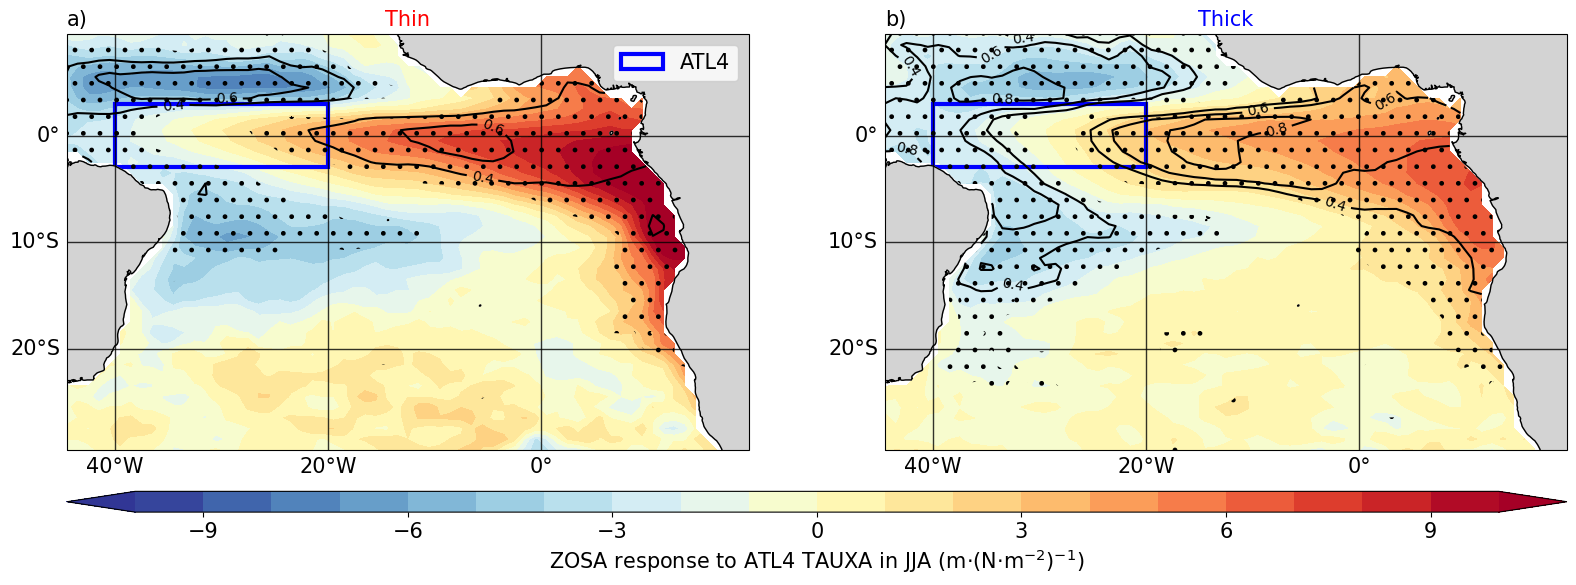

In [19]:
ftz=15


fig = plt.figure(figsize=[15, 5])
fig.patch.set_facecolor('white')
gs = gridspec.GridSpec(1, 2)



ax0  = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax1  = fig.add_subplot(gs[0, 1],projection=ccrs.PlateCarree())


cax0 = inset_axes(ax0,
                   width="220%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.15, 1, 1),
                   bbox_transform=ax0.transAxes,
                   borderpad=0,
                   )



plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.4
                    ,
                    wspace=0.2) 



levels=np.arange(-10,11,1)

levels1=np.arange(-5,5.5,0.5)
cmap = plt.cm.RdYlBu_r

cmap1 = plt.cm.bwr

p0=plot_regress_map(ax0,bf2_1,levels=levels,cmap=cmap)
p1=plot_regress_map(ax1,bf2_2,levels=levels,cmap=cmap)


ax0.set_title('Thin',fontsize=ftz,color='red')
ax1.set_title('Thick',fontsize=ftz,color='blue')



ax0.add_patch(mpatches.Rectangle(xy=[-40, -3], width=20, height=6,edgecolor='blue',fill=None,
                                    alpha=1,linewidth=3,label='ATL4',transform=ccrs.PlateCarree()))
ax0.legend(fontsize=ftz)


ax1.add_patch(mpatches.Rectangle(xy=[-40, -3], width=20, height=6,edgecolor='blue',fill=None,
                                    alpha=1,linewidth=3,label='ATL3',transform=ccrs.PlateCarree()))






cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'ZOSA response to ATL4 TAUXA in JJA (m$\cdot$(N$\cdot$m$^{-2}$)$^{-1}$)', size=ftz)





ax0.text(0,
         1.02, 'a)',transform=ax0.transAxes,size=ftz)
ax1.text(0,
         1.02, 'b)',transform=ax1.transAxes,size=ftz)

plt.savefig('figures/figure_BF2_atl_JJA.png',
             dpi = 300,
            bbox_inches='tight')

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487

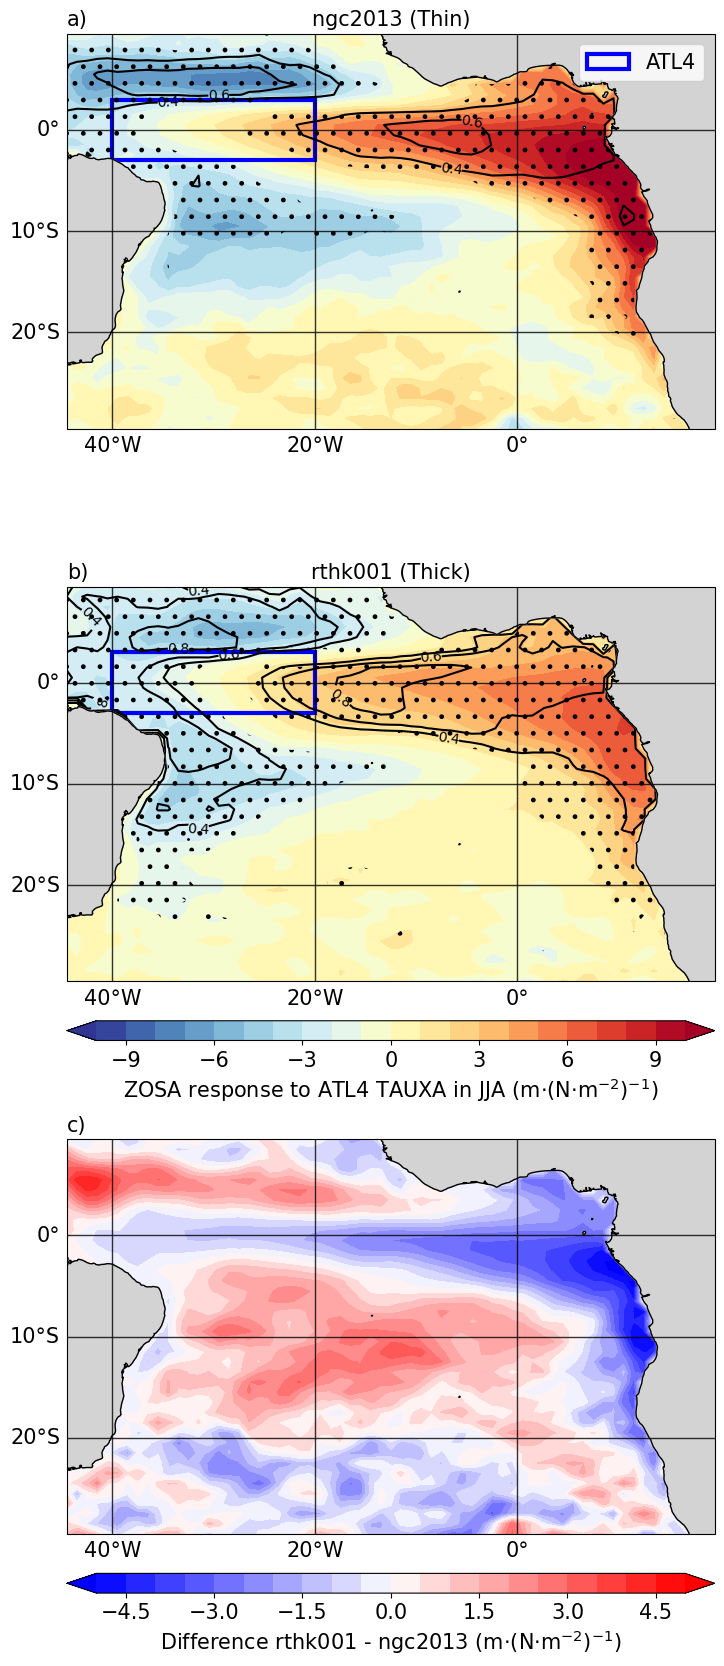

In [13]:
ftz=15


fig = plt.figure(figsize=[10, 15])
fig.patch.set_facecolor('white')
gs = gridspec.GridSpec(3, 1)



ax0  = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax1  = fig.add_subplot(gs[1, 0],projection=ccrs.PlateCarree())
ax2  = fig.add_subplot(gs[2, 0],projection=ccrs.PlateCarree())


cax0 = inset_axes(ax1,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.15, 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0,
                   )

cax2 = inset_axes(ax2,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.15, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )


plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.4
                    ,
                    wspace=0.2) 



levels=np.arange(-10,11,1)

levels1=np.arange(-5,5.5,0.5)
cmap = plt.cm.RdYlBu_r

cmap1 = plt.cm.bwr

p0=plot_regress_map(ax0,bf2_1,levels=levels,cmap=cmap)
p1=plot_regress_map(ax1,bf2_2,levels=levels,cmap=cmap)


p2=plot_regress_map_diff(ax2,bf2_2 - bf2_1,levels=levels1,cmap=cmap1)
ax0.set_title('ngc2013 (Thin)',fontsize=ftz)
ax1.set_title('rthk001 (Thick)',fontsize=ftz)



ax0.add_patch(mpatches.Rectangle(xy=[-40, -3], width=20, height=6,edgecolor='blue',fill=None,
                                    alpha=1,linewidth=3,label='ATL4',transform=ccrs.PlateCarree()))
ax0.legend(fontsize=ftz)


ax1.add_patch(mpatches.Rectangle(xy=[-40, -3], width=20, height=6,edgecolor='blue',fill=None,
                                    alpha=1,linewidth=3,label='ATL3',transform=ccrs.PlateCarree()))






cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'ZOSA response to ATL4 TAUXA in JJA (m$\cdot$(N$\cdot$m$^{-2}$)$^{-1}$)', size=ftz)




cbar = plt.colorbar(p2,cax2,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'Difference rthk001 - ngc2013 (m$\cdot$(N$\cdot$m$^{-2}$)$^{-1}$)', size=ftz)


ax0.text(0,
         1.02, 'a)',transform=ax0.transAxes,size=ftz)
ax1.text(0,
         1.02, 'b)',transform=ax1.transAxes,size=ftz)
ax2.text(0,
         1.02, 'c)',transform=ax2.transAxes,size=ftz)


plt.savefig('figures/figure_BF2_atl_JJA.png',
             dpi = 300,
            bbox_inches='tight')